In [72]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [73]:
df=pd.read_csv('summer.csv')
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [74]:
df.shape

(31165, 9)

In [75]:
df.count()

Year          31165
City          31165
Sport         31165
Discipline    31165
Athlete       31165
Country       31161
Gender        31165
Event         31165
Medal         31165
dtype: int64

In [76]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [77]:
# Fill the missing categorical values with mode
df['Country'].fillna(str(df['Country'].mode().values[0]), inplace=True)

In [78]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [79]:
print("No. of Sports =", len(df['Sport'].unique()))


No. of Sports = 43


**Q-1-** In how many cities Summer Olympics is held so far?

In [80]:
print("No. of City in which Olympics are held  =", len(df['City'].unique()))

No. of City in which Olympics are held  = 22


Cities in which most olympics held

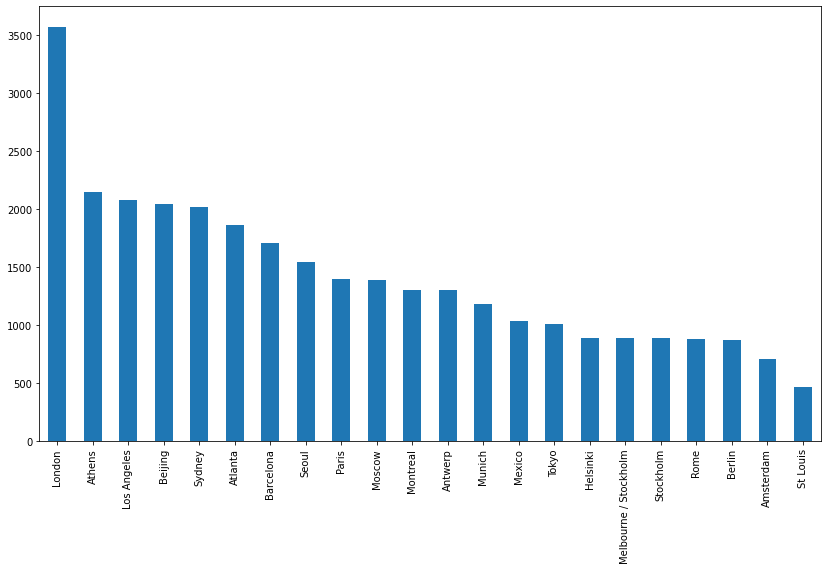

In [82]:
plt.figure(figsize=(14, 8))
df["City"].value_counts().plot(kind="bar")

**Q-2-** Which sport is having most number of Gold Medals so far? (Top 5)

In [83]:
medal = df[["Sport","Medal"]]
medalg = medal[medal["Medal"]=="Gold"]
medalg["Sport"].describe()
medalg["Sport"].value_counts(ascending=False).head()

Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

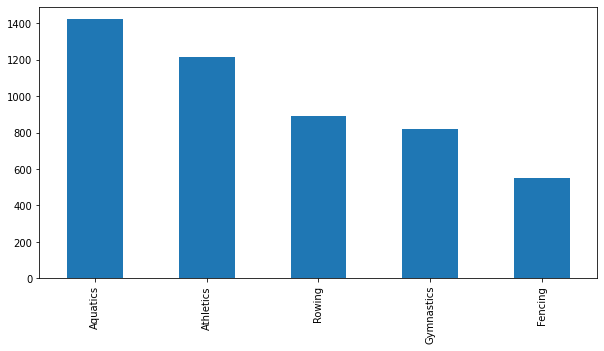

In [84]:
#No. of Gold medal in Sports(Top 5)
plt.figure(figsize=(10, 5))
medalg["Sport"].value_counts(ascending=False).head().plot(kind="bar")

**Q-3-** Which sport is having most number of medals so far? (Top 5)

In [85]:
medal["Sport"].value_counts(ascending=False).head()

Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Sport, dtype: int64

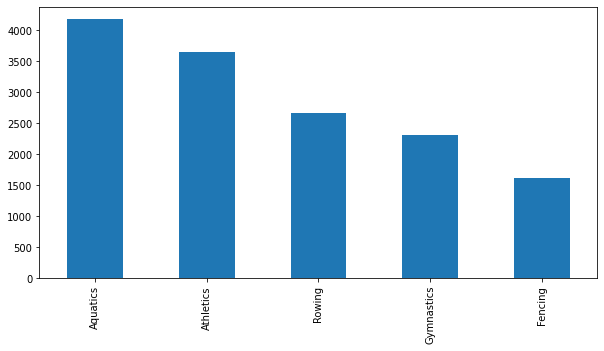

In [86]:
plt.figure(figsize=(10, 5))
medal["Sport"].value_counts(ascending=False).head().plot(kind="bar")

**Q-4-** Which player has won most number of medals?

In [87]:
player = df[["Athlete","Medal"]]

player["Athlete"].value_counts(ascending=False).head()

PHELPS, Michael       22
LATYNINA, Larisa      18
ANDRIANOV, Nikolay    15
ONO, Takashi          13
SHAKHLIN, Boris       13
Name: Athlete, dtype: int64

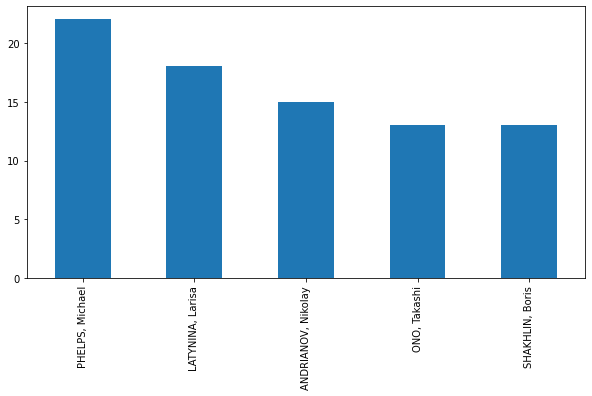

In [88]:
plt.figure(figsize=(10, 5))
player["Athlete"].value_counts(ascending=False).head().plot(kind="bar")

**Q-5-** Which player has won most number Gold Medals of Medals?

In [89]:

player = df[["Athlete","Medal"]]
Gplayer = player[player["Medal"]=="Gold"]
Gplayer["Athlete"].value_counts(ascending=False).head()

PHELPS, Michael     18
NURMI, Paavo         9
LEWIS, Carl          9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Athlete, dtype: int64

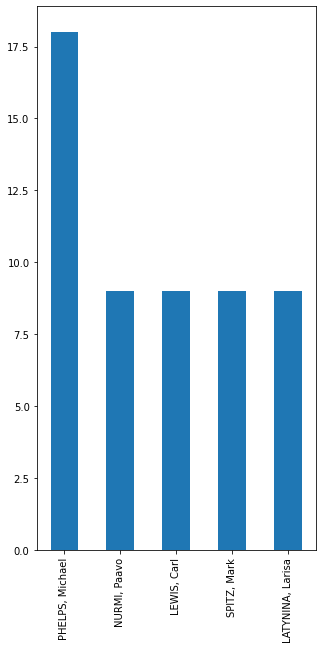

In [90]:
plt.figure(figsize=(5, 10))
Gplayer["Athlete"].value_counts(ascending=False).head().plot(kind="bar")

**Q-6-** In which year India won first Gold Medal in Summer Olympics?

In [91]:
country_medal_year = df[['Country', 'Medal', 'Year']]
# country_medal_year

ind_medal_year = country_medal_year[country_medal_year['Country'] == 'IND']
# ind_medal_year

ind_gold_year = ind_medal_year[ind_medal_year['Medal'] == 'Gold'].sort_values(by='Year')
# ind_gold_year

print('India Won the First Gold Medal in', ind_gold_year['Year'].iloc[0], 'in Summer Olympics')

India Won the First Gold Medal in 1928 in Summer Olympics


**Q-7-** Which event is most popular in terms on number of players? (Top 5)

In [92]:
evt= df[["Event","Athlete"]]
evt["Event"].value_counts(ascending=False).head()

Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64

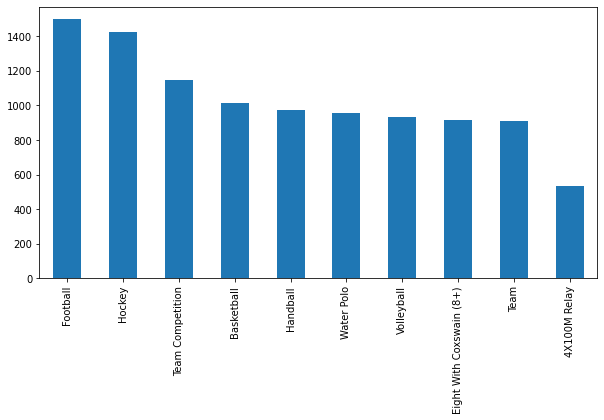

In [93]:
plt.figure(figsize=(10, 5))
evt["Event"].value_counts(ascending=False).head(10).plot(kind="bar")

**Q-8-** Which Sport is having most Female Gold Medalists? (Top 5)

In [94]:

female=df[["Sport","Medal","Gender"]]
femaleg=female[female["Medal"]=="Gold"]
femalegm=femaleg[femaleg["Gender"]=="Women"]
femalegm.describe()

,Sport,Medal,Gender
count,2788,2788,2788
unique,30,1,1
top,Aquatics,Gold,Women
freq,589,2788,2788
